In [7]:
pd.Series([1, 1, 2, 2, 2, 3]).mode()

0    2
dtype: int64

In [16]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [17]:
summary_df = scores_df.copy()
summary_df['偏差'] = deviation
summary_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [18]:
summary_df.mean()

点数    55.0
偏差     0.0
dtype: float64

In [19]:
np.mean(deviation ** 2)

86.0

In [11]:
np.var(scores)


86.0

In [12]:
scores_df.var()


点数    95.555556
dtype: float64

In [20]:
summary_df['偏差二乗'] = np.square(deviation)
summary_df

,点数,偏差,偏差二乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [21]:
summary_df.mean()

点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64

In [22]:
np.sqrt(np.var(scores, ddof=0))


9.2736184954957039

In [23]:
np.std(scores, ddof = 0 )

9.2736184954957039

In [24]:
np.max(scores) - np.min(scores)

28

In [29]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [30]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [32]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [33]:
np.mean(z), np.std(z, ddof=0)


(-1.6653345369377347e-17, 0.99999999999999989)

In [35]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([ 35.98173948,  65.09658825,  51.07832773,  34.90341175,
        52.15665546,  42.45170588,  60.78327732,  43.53003361,
        60.78327732,  53.2349832 ])

In [36]:
scores_df['偏差値'] = z
scores_df

,点数,偏差値
生徒,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [52]:
import pandas as pd 
import numpy as np

df = pd.read_csv('ch2_scores_em.csv', index_col='生徒番号')
scores = np.array(df['英語'])[:10]
scores_df = pd.DataFrame({'点数':scores},
                        index=pd.Index(['A','B','C','D','E',
                                        'F','G','H','I','J'],
                                      name='生徒'))
sorted_scores = np.sort(scores)

scores_df.median()

点数    56.5
dtype: float64

In [53]:
english_scores = np.array(df['英語'])
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [54]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [55]:
freq_class = ['f{i}~{i+10}' for i in range(0, 100, 10)]

freq_dist_df = pd.DataFrame({'度数':freq},
                           index=pd.Index(freq_class,
                                         name='階級'))
freq_dist_df

,度数
階級,
f{i}~{i+10},0
f{i}~{i+10},0
f{i}~{i+10},0
f{i}~{i+10},2
f{i}~{i+10},8
f{i}~{i+10},16
f{i}~{i+10},18
f{i}~{i+10},6
f{i}~{i+10},0


In [56]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [57]:
rel_freq = freq / freq.sum()
rel_freq


array([ 0.  ,  0.  ,  0.  ,  0.04,  0.16,  0.32,  0.36,  0.12,  0.  ,  0.  ])

In [58]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([ 0.  ,  0.  ,  0.  ,  0.04,  0.2 ,  0.52,  0.88,  1.  ,  1.  ,  1.  ])

In [59]:
freq_dist_df['階級値'] = class_value
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
freq_dist_df = freq_dist_df[['階級値','度数','相対度数','累積相対度数']]

freq_dist_df


,階級値,度数,相対度数,累積相対度数
階級,,,,
f{i}~{i+10},5,0,0.00,0.00
f{i}~{i+10},15,0,0.00,0.00
f{i}~{i+10},25,0,0.00,0.00
f{i}~{i+10},35,2,0.04,0.04
f{i}~{i+10},45,8,0.16,0.20
f{i}~{i+10},55,16,0.32,0.52
f{i}~{i+10},65,18,0.36,0.88
f{i}~{i+10},75,6,0.12,1.00
f{i}~{i+10},85,0,0.00,1.00


In [61]:
freq_dist_df.loc[freq_dist_df['度数'].idxmax(), '階級値']


階級
f{i}~{i+10}     5
f{i}~{i+10}    15
f{i}~{i+10}    25
f{i}~{i+10}    35
f{i}~{i+10}    45
f{i}~{i+10}    55
f{i}~{i+10}    65
f{i}~{i+10}    75
f{i}~{i+10}    85
f{i}~{i+10}    95
Name: 階級値, dtype: int64

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

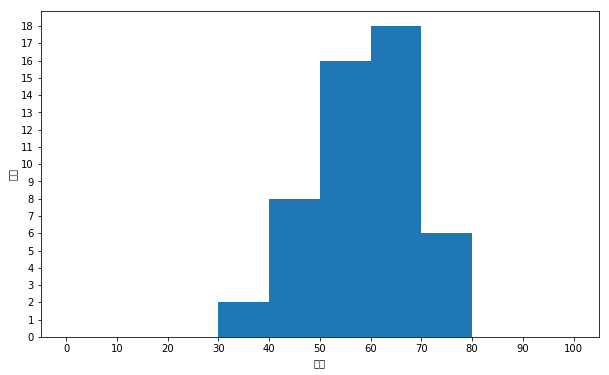

In [63]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

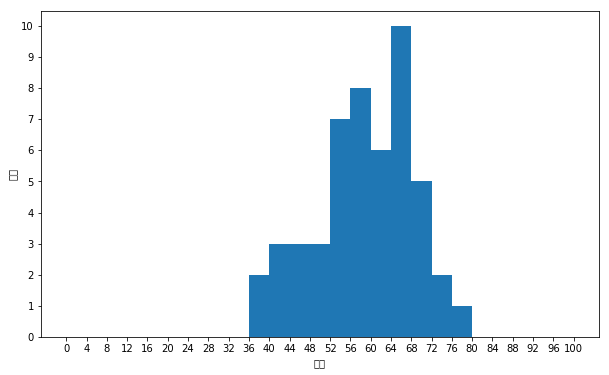

In [66]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

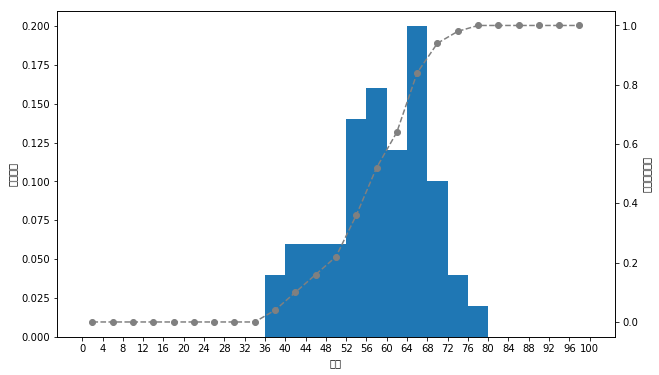

In [67]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

ax2.plot(class_value, cum_rel_freq,
        ls='--', marker='o', color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('点数')
ax1.set_ylabel('相対度数')
ax2.set_ylabel('累積相対度数')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

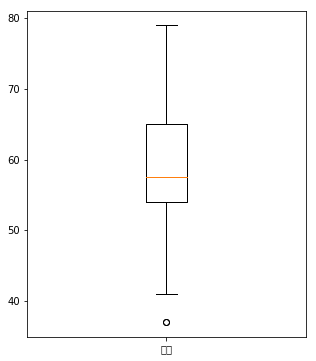

In [68]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['英語'])

plt.show()